In [2]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score, RandomizedSearchCV
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from lightgbm import LGBMClassifier

Using TensorFlow backend.


In [233]:
train=pd.read_csv('../../data/Data_team-dataset/game_data_train.csv')
val=pd.read_csv('../../data/Data_team-dataset/game_data_validation.csv')

In [ ]:
# FEATURE SELECTION ACCURACY COMPARISON

In [183]:
g5=pd.read_csv('../../data/Data_team-dataset/g5.csv')
g6=pd.read_csv('../../data/Data_team-dataset/g6.csv')

In [185]:
g5.shape

(70000, 28)

In [186]:
g6.shape

(70000, 13)

In [187]:
c5=g5.columns.tolist()

In [188]:
c6=g6.columns.tolist()

In [234]:
train5=train[c5]
val5=val[c5]
train6=train[c6]
val6=val[c6]

In [235]:
x_train5=train5.drop(['acc_id','label'],axis=1)
y_train5=train5['label']
x_val5=val5.drop(['acc_id','label'],axis=1)
y_val5=val5['label']
x_train6=train6.drop(['acc_id','label'],axis=1)
y_train6=train6['label']
x_val6=val6.drop(['acc_id','label'],axis=1)
y_val6=val6['label']

In [ ]:
# 변수 11개 일때 train 학습시키고 validation 데이터 예측한 후, f1-score

In [205]:
rf_clf.fit(x_train5,y_train5)
xgb_clf.fit(x_train5,y_train5)
dnn.fit(x_train5.values,y_train5)
lgb_clf.fit(x_train5,y_train5)

Epoch 1/100
70000/70000 [==============================] - 1s 14us/step - loss: 0.3899
Epoch 2/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3445
Epoch 3/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3281
Epoch 4/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3194
Epoch 5/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3106
Epoch 6/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3046
Epoch 7/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3001
Epoch 8/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.2962
Epoch 9/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.2957
Epoch 10/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.2920
Epoch 11/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.2900
Epoch 12/100
70000/70000 [=========================

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        importance_type='split', is_unbalance=True, learning_rate=0.1,
        max_depth=20, min_child_samples=20, min_child_weight=0.001,
        min_gain_to_split=2, min_split_gain=0.0, n_estimators=2000,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [206]:
rf_predictions5 = rf_clf.predict(x_val5)
xgb_predictions5= xgb_clf.predict(x_val5)
lgb_predictions5=lgb_clf.predict(x_val5)
dnn_predictions5 = dnn.predict(x_val5)
rf_f15=f1_score(rf_predictions5,y_val5)
xgb_f15=f1_score(xgb_predictions5,y_val5)
dnn_f15=f1_score(dnn_predictions5,y_val5)
lgb_f15=f1_score(lgb_predictions5,y_val5)

20000/20000 [==============================] - 0s 17us/step


In [ ]:
# 변수 26개로 돌렸을 때 f1 score

In [207]:
rf_f15,xgb_f15,lgb_f15,dnn_f15

(0.7942313721391995,
 0.7843873930285953,
 0.7769810293183264,
 0.7411210954214806)

In [ ]:
# 변수 11개 train 훈련시킨후, validation 예측 후 , f1 score

In [239]:
rf_clf.fit(x_train6,y_train6)
xgb_clf.fit(x_train6,y_train6)
dnn.fit(x_train6.values,y_train6)
lgb_clf.fit(x_train6,y_train6)

Epoch 1/100
70000/70000 [==============================] - 2s 22us/step - loss: 0.4188
Epoch 2/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3811
Epoch 3/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3684
Epoch 4/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3600
Epoch 5/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3547
Epoch 6/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3507
Epoch 7/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3463
Epoch 8/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3439
Epoch 9/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3414
Epoch 10/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3404
Epoch 11/100
70000/70000 [==============================] - 0s 3us/step - loss: 0.3379
Epoch 12/100
70000/70000 [=========================

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        importance_type='split', is_unbalance=True, learning_rate=0.1,
        max_depth=20, min_child_samples=20, min_child_weight=0.001,
        min_gain_to_split=2, min_split_gain=0.0, n_estimators=2000,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [238]:
rf_predictions6 = rf_clf.predict(x_val6)
xgb_predictions6= xgb_clf.predict(x_val6)
lgb_predictions6=lgb_clf.predict(x_val6)
dnn_predictions6 = dnn.predict(x_val6)
rf_f16=f1_score(rf_predictions6,y_val6)
xgb_f16=f1_score(xgb_predictions6,y_val6)
dnn_f16=f1_score(dnn_predictions6,y_val6)
lgb_f16=f1_score(lgb_predictions6,y_val6)

ValueError: Number of features of the model must match the input. Model n_features is 26 and input n_features is 11 

In [ ]:
# 변수 11개로 돌렸을 때 f1 score

In [203]:
rf_f16,xgb_f16,lgb_f16,dnn_f16

(0.7860225239448478, 0.7728663361114042, 0.7638379683448091, 0.693794044100932)

In [208]:
rf_f16>rf_f15

False

In [ ]:
# 각각 train data 로만 k fold(k=5) 진행 후 f1 score 평균값 구하기

In [ ]:
# 변수 26개일 때

In [209]:
kFold=KFold(n_splits=10,shuffle=True,random_state=0)
rf_cv5=cross_val_score(rf_clf, x_train5,y_train5,scoring='f1',cv=kFold)
xgb_cv5=cross_val_score(xgb_clf,x_train5,y_train5,scoring='f1',cv=kFold)
lgb_cv5=cross_val_score(lgb_clf,x_train5,y_train5,scoring='f1',cv=kFold)
dnn_cv5=cross_val_score(dnn,x_train5.values,y_train5,cv=kFold,scoring='f1')
val_scores5={'rf_val_score':rf_cv5,
      'xgb_val_score':xgb_cv5,
           'lgb_val_score':lgb_cv5,
           'dnn_val_score':dnn_cv5}
df_val5=pd.DataFrame(val_scores5)


Epoch 1/100
63000/63000 [==============================] - 1s 15us/step - loss: 0.3855
Epoch 2/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3419
Epoch 3/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3311
Epoch 4/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3225
Epoch 5/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3147
Epoch 6/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3093
Epoch 7/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3039
Epoch 8/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3000
Epoch 9/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2970
Epoch 10/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2943
Epoch 11/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2923
Epoch 12/100
63000/63000 [=========================

Epoch 88/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2289
Epoch 89/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2278
Epoch 90/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2292
Epoch 91/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2267
Epoch 92/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2272
Epoch 93/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2287
Epoch 94/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2270A: 0s - loss: 0.2
Epoch 95/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2264
Epoch 96/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2258
Epoch 97/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2292
Epoch 98/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2247
Epoch 99/100
63000/63000 [

63000/63000 [==============================] - 0s 3us/step - loss: 0.2393
Epoch 75/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2405
Epoch 76/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2372
Epoch 77/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2385
Epoch 78/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2392
Epoch 79/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2387
Epoch 80/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2357
Epoch 81/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2368
Epoch 82/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2374
Epoch 83/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2348
Epoch 84/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2353
Epoch 85/100
63000/63000 [==============================

63000/63000 [==============================] - 0s 3us/step - loss: 0.2449
Epoch 61/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2519
Epoch 62/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2453
Epoch 63/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2486
Epoch 64/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2441
Epoch 65/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2436
Epoch 66/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2455
Epoch 67/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2418
Epoch 68/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2410
Epoch 69/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2440
Epoch 70/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2406
Epoch 71/100
63000/63000 [==============================

63000/63000 [==============================] - 0s 3us/step - loss: 0.2566
Epoch 46/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2562
Epoch 47/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2564
Epoch 48/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2558
Epoch 49/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2552
Epoch 50/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2524
Epoch 51/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2568
Epoch 52/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2529
Epoch 53/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2540
Epoch 54/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2527
Epoch 55/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2508
Epoch 56/100
63000/63000 [==============================

63000/63000 [==============================] - 0s 3us/step - loss: 0.2694
Epoch 32/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2641
Epoch 33/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2635
Epoch 34/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2617
Epoch 35/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2609
Epoch 36/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2600
Epoch 37/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2595
Epoch 38/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2594
Epoch 39/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2585
Epoch 40/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2562
Epoch 41/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2579
Epoch 42/100
63000/63000 [==============================

In [ ]:
# 변수 11개일 때

In [210]:
kFold=KFold(n_splits=10,shuffle=True,random_state=0)
rf_cv6=cross_val_score(rf_clf, x_train6,y_train6,scoring='f1',cv=kFold)
xgb_cv6=cross_val_score(xgb_clf,x_train6,y_train6,scoring='f1',cv=kFold)
lgb_cv6=cross_val_score(lgb_clf,x_train6,y_train6,scoring='f1',cv=kFold)
dnn_cv6=cross_val_score(dnn,x_train6.values,y_train6,cv=kFold,scoring='f1')
val_scores6={'rf_val_score':rf_cv6,
      'xgb_val_score':xgb_cv6,
           'lgb_val_score':lgb_cv6,
           'dnn_val_score':dnn_cv6}
df_val6=pd.DataFrame(val_scores6)


Epoch 1/100
63000/63000 [==============================] - 1s 19us/step - loss: 0.4290
Epoch 2/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3823
Epoch 3/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3718
Epoch 4/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3640
Epoch 5/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3582
Epoch 6/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3535
Epoch 7/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3523
Epoch 8/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3479
Epoch 9/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3443
Epoch 10/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3454
Epoch 11/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3410
Epoch 12/100
63000/63000 [=========================

63000/63000 [==============================] - 0s 3us/step - loss: 0.2994
Epoch 96/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2994
Epoch 97/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3006
Epoch 98/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2999
Epoch 99/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2978
Epoch 100/100
7000/7000 [==============================] - 0s 57us/step
Epoch 1/100
63000/63000 [==============================] - 1s 19us/step - loss: 0.4180
Epoch 2/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3776
Epoch 3/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3661
Epoch 4/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3589
Epoch 5/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3539
Epoch 6/100
63000/63000 [==============================] - 0s 3us/step - lo

63000/63000 [==============================] - 0s 3us/step - loss: 0.3035
Epoch 81/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3017
Epoch 82/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3010
Epoch 83/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3020
Epoch 84/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3012
Epoch 85/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3013
Epoch 86/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3023
Epoch 87/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3016
Epoch 88/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3006
Epoch 89/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3015
Epoch 90/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.2999
Epoch 91/100
63000/63000 [==============================

63000/63000 [==============================] - 0s 3us/step - loss: 0.3039
Epoch 67/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3061
Epoch 68/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3033
Epoch 69/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3031
Epoch 70/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3037
Epoch 71/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3022
Epoch 72/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3018
Epoch 73/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3028
Epoch 74/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3027
Epoch 75/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3032
Epoch 76/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3030A: 0s - loss: 0.3
Epoch 77/100
63000/63000 [=============

63000/63000 [==============================] - 0s 3us/step - loss: 0.3113
Epoch 60/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3085
Epoch 61/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3090
Epoch 62/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3078
Epoch 63/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3104
Epoch 64/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3079
Epoch 65/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3072
Epoch 66/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3077
Epoch 67/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3079
Epoch 68/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3059
Epoch 69/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3057
Epoch 70/100
63000/63000 [==============================

63000/63000 [==============================] - 0s 3us/step - loss: 0.3117
Epoch 45/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3115
Epoch 46/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3112
Epoch 47/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3108
Epoch 48/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3094
Epoch 49/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3101
Epoch 50/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3092
Epoch 51/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3091
Epoch 52/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3086
Epoch 53/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3074
Epoch 54/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3076
Epoch 55/100
63000/63000 [==============================

63000/63000 [==============================] - 0s 3us/step - loss: 0.3198
Epoch 30/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3209
Epoch 31/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3197
Epoch 32/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3186
Epoch 33/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3171
Epoch 34/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3191
Epoch 35/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3166
Epoch 36/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3168
Epoch 37/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3152
Epoch 38/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3150
Epoch 39/100
63000/63000 [==============================] - 0s 3us/step - loss: 0.3149
Epoch 40/100
63000/63000 [==============================

In [211]:
df_val5 # 변수 26개

,rf_val_score,xgb_val_score,lgb_val_score,dnn_val_score
0,0.791718,0.786109,0.782096,0.738829
1,0.795297,0.784196,0.777259,0.733376
2,0.789442,0.782946,0.774078,0.748140
3,0.802754,0.794415,0.783429,0.759448
4,0.803881,0.790917,0.788284,0.761589
5,0.802659,0.786335,0.767703,0.762161
6,0.796336,0.780906,0.774655,0.748999
7,0.791728,0.784325,0.776035,0.744803
8,0.800000,0.789192,0.781729,0.747722
9,0.793478,0.780635,0.774346,0.760178


In [214]:
df_val5.mean()

rf_val_score     0.796729
xgb_val_score    0.785998
lgb_val_score    0.777961
dnn_val_score    0.750525
dtype: float64

In [216]:
df_val6 # 변수 11개

,rf_val_score,xgb_val_score,lgb_val_score,dnn_val_score
0,0.783339,0.773350,0.765789,0.705381
1,0.786510,0.777205,0.762170,0.704127
2,0.783284,0.777146,0.762557,0.700965
3,0.793403,0.781457,0.766778,0.707584
4,0.790380,0.772468,0.776525,0.711759
5,0.786915,0.774431,0.763042,0.710972
6,0.776129,0.767392,0.752021,0.708779
7,0.793359,0.780879,0.764141,0.713757
8,0.780736,0.777977,0.760082,0.714241
9,0.783941,0.765530,0.762299,0.713417


In [215]:
df_val6.mean()

rf_val_score     0.785800
xgb_val_score    0.774784
lgb_val_score    0.763540
dnn_val_score    0.709098
dtype: float64

In [ ]:
# 모델 안전성 평가

In [127]:
#트리기반 모델링
rf=RandomForestClassifier()
xgb=XGBClassifier()
lgb=LGBMClassifier()

In [129]:
#하이퍼 파라미터 dic생성
rf_params={'max_depth':[3,10,20],
            'n_estimators':[100,1000,2000],
            'min_samples_split':[2,5,10,15,100],
            'min_samples_leaf':[1,2,5,10],
            'bootstrap':[True,False],
            'criterion':['gini','entropy']
            
}

xgb_params = {
        'n_estimators':[100,1000,2000],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 10, 20],
        }

In [130]:
lgb_params={
    'boosting_type':['gbdt','goss','dart'],
    'objective':['binary'],
    'is_unbalance':[True,False],
    'learning_rate':[0.005,0.01,0.05,0.1],
    'max_depth':[3,10,20],
    'min_gain_to_split':[2,5,10,15,100],
    'n_estimators':[100,1000,2000]
}

In [131]:
#randomsearchcv 설정.
rf_random=RandomizedSearchCV(estimator=rf, param_distributions=rf_params, scoring='f1',cv=3)
xgb_random=RandomizedSearchCV(estimator=xgb,param_distributions=xgb_params, scoring='f1',cv=3)

In [132]:
lgb_random=RandomizedSearchCV(estimator=lgb,param_distributions=lgb_params,scoring='f1',cv=3)

In [133]:
#x,y train,test 정의, 
x_train=train.drop(['acc_id','label'],axis=1)
y_train=train['label']
x_test=test.drop(['acc_id','label'],axis=1)
y_test=test['label']


In [135]:
#randomsearchcv 적용
rf_random.fit(x_train,y_train)
xgb_random.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': [100, 1000, 2000], 'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5], 'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [3, 10, 20]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [136]:
lgb_random.fit(x_train,y_train)

C:\dev\env\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\dev\env\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\dev\env\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\dev\env\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\dev\env\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'boosting_type': ['gbdt', 'goss', 'dart'], 'objective': ['binary'], 'is_unbalance': [True, False], 'learning_rate': [0.005, 0.01, 0.05, 0.1], 'max_depth': [3, 10, 20], 'min_gain_to_split': [2, 5, 10, 15, 100], 'n_estimators': [100, 1000, 2000]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='f1', verbose=0)

In [137]:
# best_params_ 변수저장.
for i in rf_random.best_params_:
    globals()['rf_{}'.format(i)]=rf_random.best_params_[i]
for i in xgb_random.best_params_:
    globals()['xgb_{}'.format(i)]=xgb_random.best_params_[i]

In [138]:
for i in lgb_random.best_params_:
    globals()['lgb_{}'.format(i)]=lgb_random.best_params_[i]

In [140]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': 20,
 'criterion': 'entropy',
 'bootstrap': True}

In [142]:
xgb_random.best_params_

{'subsample': 0.8,
 'n_estimators': 1000,
 'min_child_weight': 1,
 'max_depth': 20,
 'gamma': 5,
 'colsample_bytree': 0.8}

In [144]:
lgb_random.best_params_

{'objective': 'binary',
 'n_estimators': 2000,
 'min_gain_to_split': 2,
 'max_depth': 20,
 'learning_rate': 0.1,
 'is_unbalance': True,
 'boosting_type': 'dart'}

In [146]:
#randomsearch best_params로 모델설정.
rf_clf=RandomForestClassifier(
                                n_estimators=rf_n_estimators,
                                min_samples_split=rf_min_samples_split,
                                min_samples_leaf=rf_min_samples_leaf,
                                max_depth=rf_max_depth,
                                criterion=rf_criterion,
                                bootstrap=rf_bootstrap)
xgb_clf=XGBClassifier(n_estimators=xgb_n_estimators,
                    min_child_weight=xgb_min_child_weight,
                    gamma=xgb_gamma,
                    subsample=xgb_subsample,
                    colsample_bytree=xgb_colsample_bytree,
                    max_depth=xgb_max_depth,



)

lgb_clf=LGBMClassifier(
boosting_type=lgb_boosting_type,
    objective=lgb_objective,
    is_unbalance=lgb_is_unbalance,
    learning_rate=lgb_learning_rate,
    max_depth=lgb_max_depth,
    min_gain_to_split=lgb_min_gain_to_split,
    n_estimators=lgb_n_estimators
)

In [148]:
#DNN Model 구성
def create_model():
    model=Sequential()
    model.add(Dense(128,  activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer='adam')
    
    return model

In [158]:
##DNN KFold validation
np.random.seed(0)
dnn=KerasClassifier(build_fn=create_model, epochs=100, batch_size=1000, verbose=1)

Epoch 1/100
72000/72000 [==============================] - 1s 10us/step - loss: 0.3846
Epoch 2/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.3426
Epoch 3/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.3230
Epoch 4/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.3136
Epoch 5/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.3086
Epoch 6/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2985
Epoch 7/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.3073
Epoch 8/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2941
Epoch 9/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2954
Epoch 10/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2833
Epoch 11/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2778
Epoch 12/100
72000/72000 [=========================

72000/72000 [==============================] - 0s 3us/step - loss: 0.2194
Epoch 88/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2191
Epoch 89/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2208
Epoch 90/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2172
Epoch 91/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2165
Epoch 92/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2165
Epoch 93/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2167
Epoch 94/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2175
Epoch 95/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2149
Epoch 96/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2218
Epoch 97/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2198
Epoch 98/100
72000/72000 [==============================

72000/72000 [==============================] - 0s 3us/step - loss: 0.2273
Epoch 74/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2332
Epoch 75/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2301
Epoch 76/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2283
Epoch 77/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2290
Epoch 78/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2254
Epoch 79/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2268
Epoch 80/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2260
Epoch 81/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2244
Epoch 82/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2261
Epoch 83/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2223
Epoch 84/100
72000/72000 [==============================

72000/72000 [==============================] - 0s 3us/step - loss: 0.2305
Epoch 67/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2309
Epoch 68/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2289
Epoch 69/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2275
Epoch 70/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2264
Epoch 71/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2253
Epoch 72/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2256
Epoch 73/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2264
Epoch 74/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2233
Epoch 75/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2234
Epoch 76/100
72000/72000 [==============================] - 0s 3us/step - loss: 0.2226
Epoch 77/100
72000/72000 [==============================

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
#모델별 KFold validation.score값 데이터프레임화
kFold=KFold(n_splits=10,shuffle=True,random_state=0)
rf_cv6=cross_val_score(rf_clf, x_train6,y_train6,scoring='f1',cv=kFold)
xgb_cv6=cross_val_score(xgb_clf,x_train6,y_train6,scoring='f1',cv=kFold)
lgb_cv6=cross_val_score(lgb_clf,x_train6,y_train6,scoring='f1',cv=kFold)
dnn_cv6=cross_val_score(dnn,x_train6.values,y_train6,cv=kFold,scoring='f1')
val_scores6={'rf_val_score':rf_cv6,
      'xgb_val_score':xgb_cv6,
           'lgb_val_score':lgb_cv6,
           'dnn_val_score':dnn_cv6}
df_val6=pd.DataFrame(val_scores6)

In [162]:
#Data Frame 병합
dnn_cv_score=pd.DataFrame(dnn_cv,columns=['dnn_val_score'])
df_score=df_val.merge(dnn_cv_score,left_index=True,right_index=True)
df_score

,rf_val_score,xgb_val_score,lgb_val_score,dnn_val_score
0,0.803089,0.799386,0.794310,0.759791
1,0.798750,0.794832,0.782178,0.762325
2,0.810616,0.806551,0.798726,0.757794
3,0.795620,0.795031,0.784873,0.750653
4,0.791778,0.788620,0.777002,0.744148
5,0.796152,0.789898,0.782054,0.762297
6,0.803018,0.804721,0.788318,0.745801
7,0.812140,0.802492,0.797439,0.770757
8,0.802663,0.805051,0.795481,0.756905
9,0.800103,0.798367,0.794144,0.761504


In [226]:
df_val6

,rf_val_score,xgb_val_score,lgb_val_score,dnn_val_score
0,0.783339,0.773350,0.765789,0.705381
1,0.786510,0.777205,0.762170,0.704127
2,0.783284,0.777146,0.762557,0.700965
3,0.793403,0.781457,0.766778,0.707584
4,0.790380,0.772468,0.776525,0.711759
5,0.786915,0.774431,0.763042,0.710972
6,0.776129,0.767392,0.752021,0.708779
7,0.793359,0.780879,0.764141,0.713757
8,0.780736,0.777977,0.760082,0.714241
9,0.783941,0.765530,0.762299,0.713417


In [328]:
d=df_val6.unstack().reset_index().drop('level_1',axis=1).rename(columns={'level_0':'MODEL',0:'SCORE'}).replace({'rf_val_score':'RandomForest','xgb_val_score':'XGBoost','lgb_val_score':'LightGBM','dnn_val_score':'DNN'})

In [332]:
d

,MODEL,SCORE
0,RandomForest,0.783339
1,RandomForest,0.786510
2,RandomForest,0.783284
3,RandomForest,0.793403
4,RandomForest,0.790380
5,RandomForest,0.786915
6,RandomForest,0.776129
7,RandomForest,0.793359
8,RandomForest,0.780736
9,RandomForest,0.783941


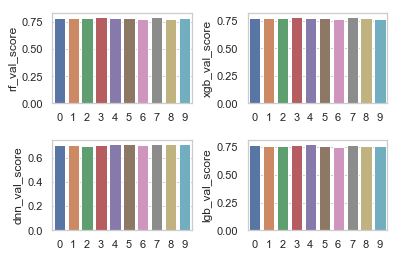

In [227]:
#validation 시각화
sns.set(style='whitegrid')
plt.subplot(2,2,1)
sns.barplot(x=df_val6.index,y='rf_val_score',data=df_val6)
plt.subplot(2,2,2)
sns.barplot(x=df_val6.index,y='xgb_val_score',data=df_val6)
plt.subplot(2,2,3)
sns.barplot(x=df_val6.index,y='dnn_val_score',data=df_val6)
plt.subplot(2,2,4)
sns.barplot(x=df_val6.index,y='lgb_val_score',data=df_val6)
plt.subplots_adjust(wspace = .4,hspace = .4)

In [343]:
df_t.rename(index={'rf':'RF','xgb':'XGB','lgb':'LGB','dnn':'DNN'},inplace=True)

In [1]:
## 평균과 표준편차 시각화 
sns.set_style("white")
df_t=pd.DataFrame({'mean_score':[df_val6['rf_val_score'].mean(),df_val6['xgb_val_score'].mean(),df_val6['lgb_val_score'].mean(),df_val6['dnn_val_score'].mean()],
                      'std':[df_val6['rf_val_score'].std(),df_val6['xgb_val_score'].std(),df_val6['lgb_val_score'].std(),df_val6['dnn_val_score'].std()]},index=['RF','XGB','LGB','DNN'])
plt.subplot(1,2,1)
plot1=sns.barplot(x=df_t.index,y='mean_score',data=df_t)
plt.subplot(1,2,2)
plot2=sns.barplot(x=df_t.index,y='std',data=df_t)

plt.tight_layout()
for p in plot1.patches:
    plot1.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
for p in plot2.patches:
    plot2.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

NameError: name 'sns' is not defined

In [229]:
print(df_val6['rf_val_score'].mean())
print(df_val6['xgb_val_score'].mean())
print(df_val6['lgb_val_score'].mean())
print(df_val6['dnn_val_score'].mean())

0.7857995531105189
0.774783546966631
0.7635404949162246
0.7090979639325024


In [244]:
df_val6.std()

rf_val_score     0.005505
xgb_val_score    0.005282
lgb_val_score    0.006090
dnn_val_score    0.004527
dtype: float64

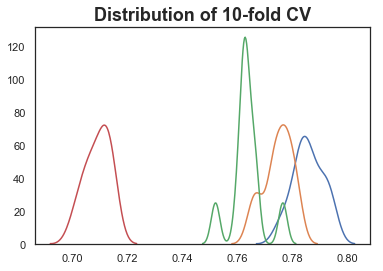

In [361]:
sns.set_style("white")
r=d.loc[d['MODEL']=='RandomForest']
x=d.loc[d['MODEL']=='XGBoost']
m=d.loc[d['MODEL']=='LightGBM']
n=d.loc[d['MODEL']=='DNN']
plt.title('Distribution of 10-fold CV', weight='bold').set_fontsize('18')
sns.distplot(r[['SCORE']],hist=False)
sns.distplot(x[['SCORE']],hist=False)
sns.distplot(m[['SCORE']],hist=False)
sns.distplot(n[['SCORE']],hist=False)
plt.show()

In [150]:
#train 과정
rf_clf.fit(x_train,y_train)
xgb_clf.fit(x_train,y_train)
dnn.fit(x_train.values,y_train)
lgb_clf.fit(x_train,y_train)

Epoch 1/100
80000/80000 [==============================] - 1s 14us/step - loss: 0.4143
Epoch 2/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.3375
Epoch 3/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.3205
Epoch 4/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.3328
Epoch 5/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.3069
Epoch 6/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.3248
Epoch 7/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.2991
Epoch 8/100
80000/80000 [==============================] - ETA: 0s - loss: 0.2958- ETA: 0s - lo - 1s 8us/step - loss: 0.2955
Epoch 9/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.2933
Epoch 10/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.2877
Epoch 11/100
80000/80000 [==============================] - 1s 8us/step - loss: 0.2858
Epoch 12/100

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
        importance_type='split', is_unbalance=True, learning_rate=0.1,
        max_depth=20, min_child_samples=20, min_child_weight=0.001,
        min_gain_to_split=2, min_split_gain=0.0, n_estimators=2000,
        n_jobs=-1, num_leaves=31, objective='binary', random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

In [240]:
rf_predictions6 = rf_clf.predict(x_val6)
xgb_predictions6= xgb_clf.predict(x_val6)
lgb_predictions6=lgb_clf.predict(x_val6)
dnn_predictions6 = dnn.predict(x_val6)
rf_f16=f1_score(rf_predictions6,y_val6)
xgb_f16=f1_score(xgb_predictions6,y_val6)
dnn_f16=f1_score(dnn_predictions6,y_val6)
lgb_f16=f1_score(lgb_predictions6,y_val6)

20000/20000 [==============================] - 1s 29us/step


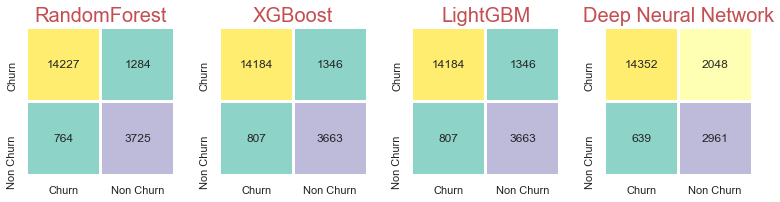

In [284]:
#test와 시각화 과정.

fig = plt.figure(figsize=(13,13))
fig.set_facecolor("None")


plt.subplot(1,4,1)
rf_conf_matrix = confusion_matrix(rf_predictions6,y_val6)
sns.heatmap(rf_conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Churn","Non Churn"],
                yticklabels=["Churn","Non Churn"],
                linewidths = 2,linecolor = "w",cmap = "Set3",cbar=False)
plt.title('RandomForest',color = "r",fontsize=20)

plt.subplot(1,4,2)
xgb_conf_matrix = confusion_matrix(xgb_predictions6,y_val6)
sns.heatmap(xgb_conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Churn","Non Churn"],
                yticklabels=["Churn","Non Churn"],
                linewidths = 2,linecolor = "w",cmap = "Set3",cbar=False)
plt.title('XGBoost',color = "r",fontsize=20)

plt.subplot(1,4,3)
lgb_conf_matrix=confusion_matrix(xgb_predictions6,y_val6)
sns.heatmap(lgb_conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Churn","Non Churn"],
                yticklabels=["Churn","Non Churn"],
                linewidths = 2,linecolor = "w",cmap = "Set3",cbar=False)
plt.title('LightGBM',color = "r",fontsize=20)

plt.subplot(1,4,4)
dnn_conf_matrix = confusion_matrix(dnn_predictions6,y_val6)
sns.heatmap(dnn_conf_matrix,annot=True,fmt = "d",square = True,
                xticklabels=["Churn","Non Churn"],
                yticklabels=["Churn","Non Churn"],
                linewidths = 2,linecolor = "w",cmap = "Set3",cbar=False)
plt.title('Deep Neural Network',color = "r",fontsize=20)
plt.subplots_adjust(wspace = .3,hspace = .3)


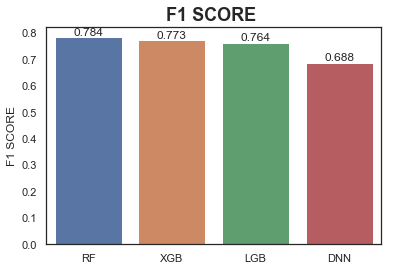

In [360]:
## for 윤식 f1score 시각화와 주석달기.
sns.set_style("white")
plt.title('F1 SCORE ', weight='bold').set_fontsize('18')
df_f1=pd.DataFrame({'f1':[rf_f16,xgb_f16,lgb_f16,dnn_f16]},index=['RF','XGB','LGB','DNN'])
df_f1.rename(columns={'f1':'F1 SCORE'},inplace=True)
plot=sns.barplot(x=df_f1.index,y='F1 SCORE',data=df_f1)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

In [243]:
rf_f16,xgb_f16,lgb_f16,dnn_f16

(0.7843756580332703,
 0.7728663361114042,
 0.7638379683448091,
 0.6878847717504937)

In [288]:
promotion=pd.read_csv('../../data/data_team-dataset/promotion_data.csv')

In [291]:
promotion.shape

(10000, 119)

In [292]:
promotion1=promotion[g6.columns.tolist()]

In [293]:
promotion1.shape

(10000, 13)

In [296]:
x_promotion=promotion1.drop(['acc_id','label'],axis=1)

In [297]:
prob1=pd.DataFrame(rf_clf.predict_proba(x_promotion))

In [298]:
prob1

,0,1
0,0.000000,1.000000
1,0.902555,0.097445
2,0.058347,0.941653
3,0.995121,0.004879
4,1.000000,0.000000
5,0.951989,0.048011
6,0.903167,0.096833
7,0.965035,0.034965
8,0.643567,0.356433
9,0.968330,0.031670


In [299]:
prob1.columns=['Churn','NonChurn']

In [300]:
probability1=pd.concat([promotion1['acc_id'],prob1],axis=1)

In [301]:
probability1.shape

(10000, 3)

In [302]:
probability1.drop(['NonChurn'],axis=1,inplace=True)

In [303]:
probability1

,acc_id,Churn
0,0916e9784a7bfb488f4e8a2f2f86a57ecc6e0d75330272...,0.000000
1,9aa6a3538bded90b3d5cc12561792e5329ec90583e226f...,0.902555
2,87d47d765754bae9580fa6255b3a028abd26cbf14ce409...,0.058347
3,368bbe0da748a6f27493f3a72a7a226d2bf68020a77df8...,0.995121
4,09e30cef333a611a3cd1abdcd9951e563e35447bffd849...,1.000000
5,839364c8884efd48efc0bafbd23914f0c02b0b1f6eec53...,0.951989
6,d78f2701782afab26aa6218dece50e94de9023a3824605...,0.903167
7,1b02e8239811fce7d0a4f890cd346891d34ef85b6e7ee3...,0.965035
8,99246c9fa6274d5f73423eb265d1d163f4f1033d4933a2...,0.643567
9,68711860bd2392aeab3601b53ed80c546630684ff80f0c...,0.968330


In [304]:
probability1.to_csv('../../data/final_data/user_churn_prob.csv',index=False)

In [306]:
k=pd.read_csv('../../data/final_data/user_churn_prob.csv')

In [307]:
k.shape

(10000, 2)

In [285]:
prob=pd.DataFrame(rf_clf.predict_proba(x_val6))

In [286]:
prob

,0,1
0,1.000000,0.000000
1,0.372360,0.627640
2,0.885046,0.114954
3,0.165783,0.834217
4,0.996141,0.003859
5,0.666747,0.333253
6,0.824842,0.175158
7,0.998717,0.001283
8,1.000000,0.000000
9,0.094275,0.905725


In [260]:
prob.columns = ['Churn','NonChurn']

In [250]:
val6.head()

,acc_id,label,week8_cnt_dt,week6_play_time,week4_play_time,week4_cnt_dt,week3_play_time,week1_play_time,total_quest_hongmun,total_making_cnt,total_item_hongmun,total_game_combat_time,total_cnt_clear_raid_light
0,50f61477d97ee7ca705ff59c9475c146598cc6912e7d90...,0,-0.025303,-0.661667,-0.661667,-0.870099,-0.661667,-0.661667,-1.475391,-0.626233,-2.382272,-2.817565,-3.209263
1,e64795be24c8d7656122631c5e30fdfe8b1c1546ad71c5...,1,1.482040,2.412021,1.572829,1.711567,2.326002,-0.654902,7.863780,-2.924292,-0.074184,19.939950,-3.209263
2,090323e751285d7b1f24e523307990131131e62ca32e44...,0,0.477144,-0.661667,-0.656772,0.605139,-0.656742,-0.661667,-3.901330,-2.924292,-2.450829,-4.558735,-3.209263
3,744078ccf3dc1b630ac33c02c54765d989640b6ae63d34...,1,0.979592,0.608896,0.851850,1.342758,1.499499,1.580049,5.274293,5.663191,4.294770,-1.292803,2.604382
4,f5520b1dde644bca1b4d47d7c7cb150a027fb7259543bd...,0,0.477144,-0.657958,-0.657761,0.236329,-0.661667,-0.661667,-3.901330,-2.924292,-2.450829,-4.558735,-3.209263


In [251]:
val6.shape

(20000, 13)

In [261]:
prob

,Churn,NonChurn
0,1.000000,0.000000
1,0.372360,0.627640
2,0.885046,0.114954
3,0.165783,0.834217
4,0.996141,0.003859
5,0.666747,0.333253
6,0.824842,0.175158
7,0.998717,0.001283
8,1.000000,0.000000
9,0.094275,0.905725


In [262]:
probability=pd.concat([val6['acc_id'],prob],axis=1)

In [264]:
probability.drop(['NonChurn'],axis=1,inplace=True)

In [265]:
probability.to_csv('../../data/final_data/user_churn_prob.csv',index=False)

In [266]:
#rf_model에 모델 저장하는 과정
import pickle 
rf='../../data/Data_team-dataset/rf_model.sav'
pickle.dump(rf_clf,open(rf,'wb'))

#rf_load에 모델을 불러오는 과정
import pickle
rf='../../data/Data_team-dataset/rf_model.sav'
rf_load=pickle.load(open(rf,'rb'))

In [310]:
f=pd.DataFrame(data={'columns': x_train6.columns,'feature_importance':rf_clf.feature_importances_})
f2=f.sort_values(by='feature_importance',ascending=False).reset_index().drop('index',axis=1)

In [312]:
f2

,columns,feature_importance
0,total_item_hongmun,0.157603
1,week3_play_time,0.115496
2,week4_play_time,0.114822
3,week1_play_time,0.114248
4,total_cnt_clear_raid_light,0.095059
5,week6_play_time,0.095054
6,total_game_combat_time,0.083196
7,total_quest_hongmun,0.081417
8,week8_cnt_dt,0.051755
9,week4_cnt_dt,0.046985


In [314]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

matplotlib.rc('font', **font)

NameError: name 'matplotlib' is not defined

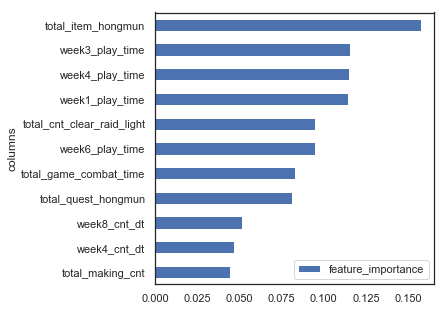

In [362]:
sns.set_style("white")
ax=f2.plot.barh(x='columns',y='feature_importance',figsize=(5,5))
plt.gca().invert_yaxis()